## Multinomial Classification (normal or DOS or PROBE or R2L or U2R)

### Initial dataset analysis

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport


In [152]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [153]:
train=pd.read_csv('NSL_Dataset/Train.txt',sep=',')
test=pd.read_csv('NSL_Dataset/Test.txt',sep=',')

In [154]:
# Define the column names

columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", 
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", 
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack", "last_flag"
]

In [155]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [156]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 



In [157]:
len(columns)

43

In [158]:

train.columns=columns
test.columns=columns

In [159]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [160]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [163]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [164]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [165]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [166]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [167]:
train.shape

(125972, 44)

### Exploratory analysis

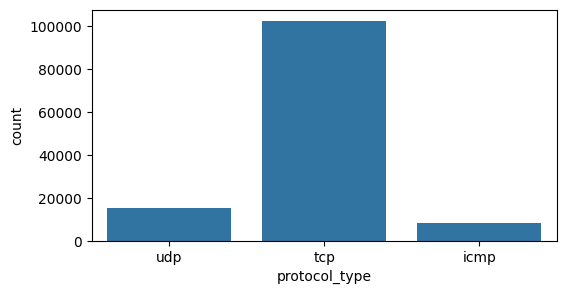

In [168]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

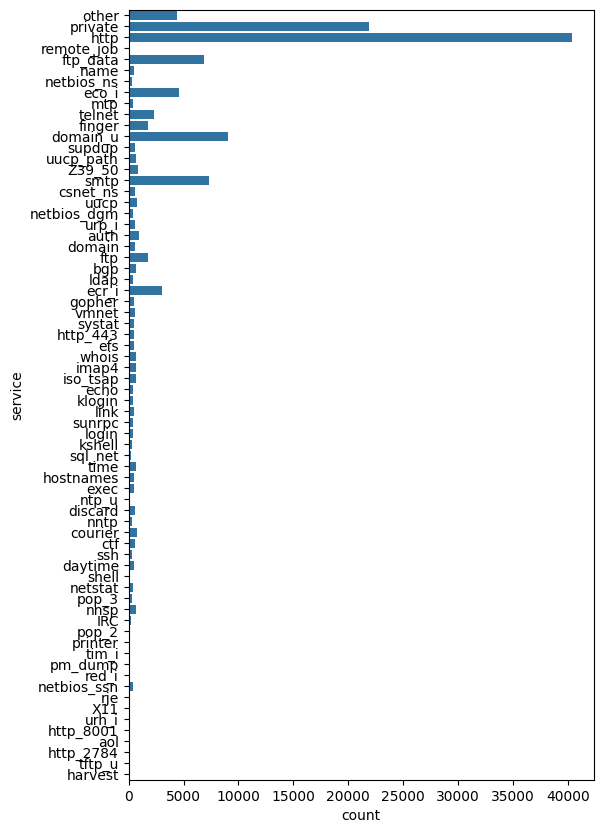

In [169]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

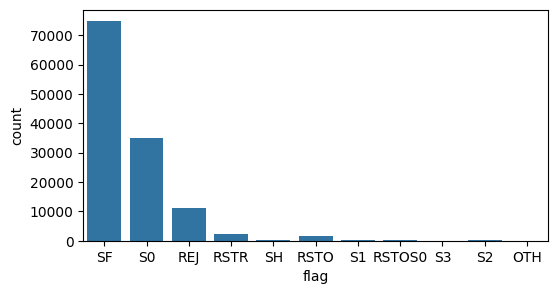

In [170]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

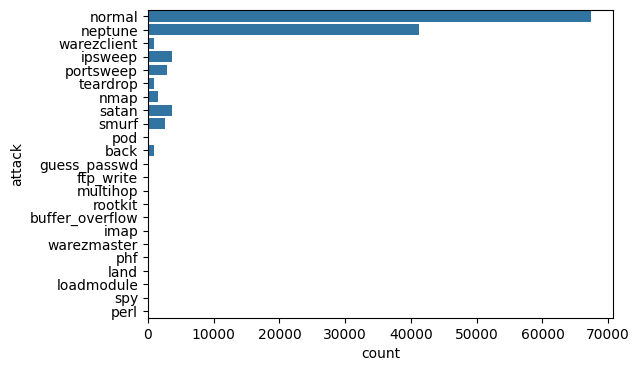

In [171]:
# attack distribution
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

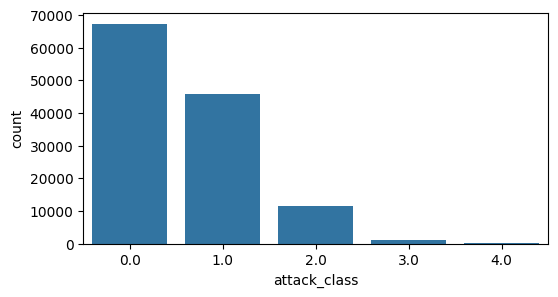

In [172]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

### Identifying relationships (between Y & numerical independent variables by comparing means)

In [173]:
train.groupby('attack_class').mean(numeric_only=True).T


attack_class,0.0,1.0,2.0,3.0,4.0
duration,168.589899,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.467064,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.749517,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230658,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710656,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507083,0.019226,0.000601,0.077387,1.211538


In [174]:
print("Wrong Fragments in Normal:", train[train['attack_class'] == 0]['wrong_fragment'].sum())
print("Wrong Fragments in Attacks:", train[train['attack_class'] > 0]['wrong_fragment'].sum())

Wrong Fragments in Normal: 0
Wrong Fragments in Attacks: 2858


 Observations:
- Duration is higher for some attacks (Probe) but lower/zero for others (DoS).
- Wrong fragments in the connection is only present in attack.
- Number of outbound commands in an ftp session  are 0 in both normal and attack.

In [175]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [176]:
numeric_var_names

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'attack_class']

In [177]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [178]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1.0
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0.0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1.0


In [179]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


## Data audit report

In [180]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [181]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,3.617247e+07,287.146929,0.00,2.604526e+03,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,5.740179e+09,45567.100824,44.00,5.870354e+06,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,2.491634e+09,19779.271433,0.00,4.021285e+06,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
land,125972.0,0.0,2.500000e+01,0.000198,0.00,1.408613e-02,1.984190e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.0,2.858000e+03,0.022688,0.00,2.535310e-01,6.427796e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.0,1.400000e+01,0.000111,0.00,1.436608e-02,2.063844e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.0,2.575000e+04,0.204411,0.00,2.149977e+00,4.622401e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125972.0,0.0,1.540000e+02,0.001222,0.00,4.523932e-02,2.046596e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.0,4.985200e+04,0.395739,0.00,4.890107e-01,2.391315e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125972.0,0.0,3.517800e+04,0.279253,0.00,2.394214e+01,5.732259e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


### Handling outliers

Dropping attack_class from train_num and test_num so that subsequent numeric processing (outlier capping) is applied only to feature columns, not to the target.

Class 3 and 4 values were imbalanced and if we clip the percentile, then we loose training data on these 2 classes

In [182]:
y_train_class = train_num['attack_class'].copy()
y_test_class = test_num['attack_class'].copy()

# Remove attack_class before capping
train_num = train_num.drop(columns=['attack_class'])
test_num = test_num.drop(columns=['attack_class'])

In [183]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num = train_num.apply(outlier_capping)
test_num = test_num.apply(outlier_capping)

No missing in train dataset . So , Missing treatment not required .

In [184]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(cat_summary)

In [185]:
cat_summary

,protocol_type,service,flag,attack
N,125972,125972,125972,125972
NMISS,0,0,0,0
ColumnsNames,protocol_type tcp 102688 udp 14993 ic...,service http 40338 private 21853 ...,flag SF 74944 S0 34851 REJ ...,attack normal 67342 neptune ...


Restoring the attack class values

In [186]:
train_num['attack_class'] = y_train_class.values
test_num['attack_class'] = y_test_class.values

### Dummy Variable Creation

In [187]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True, dtype=int)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [188]:
train_cat.head()

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


we cannot add attack here, because that is the target variable and if we add attack column to training set, then there will be data leakage and no actual accuracy

In [189]:
#for c_feature in categorical_features
for c_feature in ['protocol_type', 'service', 'flag']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

,attack,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,normal,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,neptune,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,normal,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,normal,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,neptune,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [190]:
train_cat.drop(columns=['attack'], axis=1, inplace=True)
test_cat.drop(columns=['attack'], axis=1, inplace=True)

### Final file for analysis

In [191]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [192]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 121 entries, duration to flag_SH
dtypes: float64(17), int64(104)
memory usage: 116.3 MB


In [193]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
duration,1.000000,0.011740,0.036892,NaN,NaN,NaN,0.021274,NaN,-0.064538,0.062081,...,-0.043311,-0.003733,0.020369,0.497641,-0.085618,-0.007463,-0.004180,0.004280,-0.034730,-0.006428
src_bytes,0.011740,1.000000,0.127827,NaN,NaN,NaN,0.379973,NaN,0.163275,0.603363,...,-0.052481,-0.016138,0.007541,0.018268,-0.103728,0.041955,0.011526,0.031067,0.117346,-0.007788
dst_bytes,0.036892,0.127827,1.000000,NaN,NaN,NaN,0.127002,NaN,0.421999,0.237363,...,-0.110386,-0.033535,-0.010092,-0.021514,-0.218182,0.137051,0.043579,0.008654,0.260375,-0.016381
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
flag_S1,-0.007463,0.041955,0.137051,NaN,NaN,NaN,0.005006,NaN,0.052719,0.019502,...,-0.016867,-0.006040,-0.001542,-0.007546,-0.033338,1.000000,-0.001712,-0.001063,-0.065329,-0.002503
flag_S2,-0.004180,0.011526,0.043579,NaN,NaN,NaN,0.068759,NaN,0.033628,-0.000738,...,-0.009940,-0.003560,-0.000909,-0.004447,-0.019646,-0.001712,1.000000,-0.000627,-0.038499,-0.001475
flag_S3,0.004280,0.031067,0.008654,NaN,NaN,NaN,0.005233,NaN,0.019436,0.002002,...,-0.006172,-0.002210,-0.000564,-0.002761,-0.012200,-0.001063,-0.000627,1.000000,-0.023906,-0.000916
flag_SF,-0.034730,0.117346,0.260375,NaN,NaN,NaN,0.098076,NaN,0.641747,0.073022,...,-0.379190,-0.135793,-0.034668,-0.169644,-0.749484,-0.065329,-0.038499,-0.023906,1.000000,-0.056270


In [194]:
corrm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, duration to flag_SH
Columns: 121 entries, duration to flag_SH
dtypes: float64(121)
memory usage: 119.4+ KB


In [195]:
corrm['num_root']

duration         NaN
src_bytes        NaN
dst_bytes        NaN
land             NaN
wrong_fragment   NaN
                  ..
flag_S1          NaN
flag_S2          NaN
flag_S3          NaN
flag_SF          NaN
flag_SH          NaN
Name: num_root, Length: 121, dtype: float64

<Axes: >

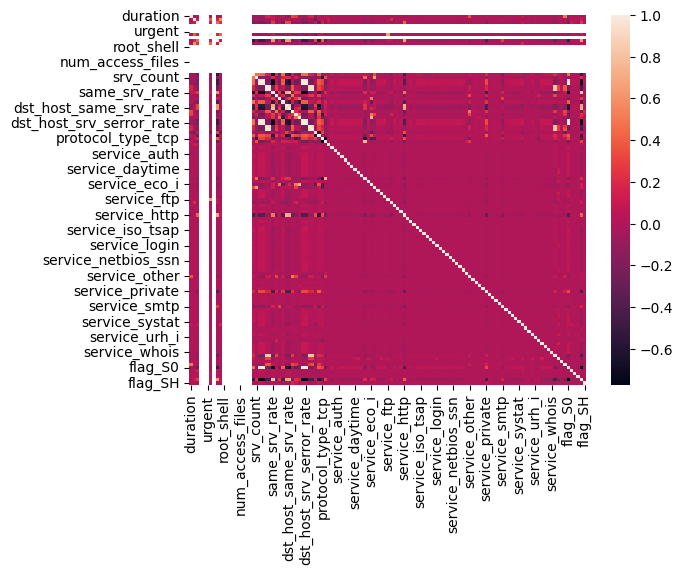

In [196]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

### Dropping columns based on data audit report
- Based on low variance (near zero variance)
- High missings (>25% missings)
- High correlations between two numerical variables

#### var summary table:
    num_outbound_cmds: Value is 0 for every single row.
    is_host_login: Almost always 0.
    land: Extremely rare (only happens ~20 times in 125,000 rows).
    urgent, num_failed_logins, root_shell, num_shells, num_access_files, num_file_creations: These all have near-zero variance.
    (p99 column for many were 0)
#### heatmap:
    dst_host_serror_rate & srv_serror_rate
    dst_host_rerror_rate & srv_rerror_rate

In [197]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

<Axes: >

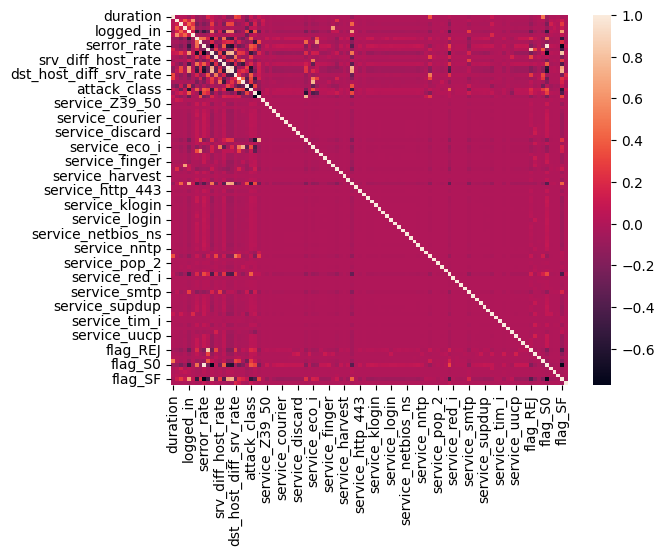

In [198]:
sns.heatmap(train_new.corr())

In [199]:
train = train_new
test = test_new

In [200]:
train_cols = [c for c in train.columns if c != 'attack_class']
for col in train_cols:
    if col not in test.columns:
        test[col] = 0

# Drop any extra columns in test that aren't in train
test = test[train_cols + ['attack_class']]

## Model Building

In [201]:
# Split features and target
X_train = train[train_cols]
y_train = train['attack_class']
X_test = test[train_cols]
y_test = test['attack_class']

class 3 and 4 are minority, and earlier clipping them in outliers results in their distribution almost = 2

In [202]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

train_cols_set = set(X_train.columns)
test_cols_set = set(X_test.columns)

print("\nIn train but not in test:", train_cols_set - test_cols_set)
print("In test but not in train:", test_cols_set - train_cols_set)

print("\nTrain class distribution:")
print(y_train.value_counts().sort_index())
print("\nTest class distribution:")
print(y_test.value_counts().sort_index())


X_train shape: (125972, 101)
X_test shape: (22543, 101)

In train but not in test: set()
In test but not in train: set()

Train class distribution:
attack_class
0.0    67342
1.0    45927
2.0    11656
3.0      995
4.0       52
Name: count, dtype: int64

Test class distribution:
attack_class
0.0    9711
1.0    7459
2.0    2421
3.0    2885
4.0      67
Name: count, dtype: int64


### Approach 1: Feature scaling and SMOTE oversampling

In [203]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Feature scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),    columns=X_test.columns)

# Standard SMOTE: balance all classes to the majority
smote_std = SMOTE(random_state=7)
X_train_res_std, y_train_res_std = smote_std.fit_resample(X_train_scaled, y_train)

print("After standard SMOTE (multinomial):")
print(pd.Series(y_train_res_std).value_counts().sort_index())

After standard SMOTE (multinomial):
attack_class
0.0    67342
1.0    67342
2.0    67342
3.0    67342
4.0    67342
Name: count, dtype: int64


#### 1) Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression on scaled, SMOTE-balanced data
lr_clf = LogisticRegression(
    random_state=0,
    solver='lbfgs',
    max_iter=10000
)
lr_clf.fit(X_train_res_std, y_train_res_std)

y_pred_lr = lr_clf.predict(X_test_scaled)

print("Logistic Regression (Multinomial, Standard SMOTE)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression (Multinomial, Standard SMOTE)
Test Accuracy: 0.8049505389699685


#### 2) k-NN

In [205]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN (k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_res_std, y_train_res_std)
y_pred_knn = knn_clf.predict(X_test_scaled)

print("k-NN (k=5, Multinomial, Standard SMOTE)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))

k-NN (k=5, Multinomial, Standard SMOTE)
Test Accuracy: 0.7754069999556403


#### 3) RandomForest

In [206]:
from sklearn.ensemble import RandomForestClassifier

rf_std = RandomForestClassifier(
    n_estimators=300,
    max_features='sqrt',
    max_depth=30,
    min_samples_split=5,
    class_weight='balanced',
    random_state=7,
    n_jobs=-1
)

rf_std.fit(X_train_res_std, y_train_res_std)
y_pred_rf_std = rf_std.predict(X_test_scaled)

print("Random Forest (Multinomial, Standard SMOTE)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_std))

Random Forest (Multinomial, Standard SMOTE)
Test Accuracy: 0.7703056381138269


#### 4) XGBoost

In [207]:
from xgboost import XGBClassifier

xgb_std = XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=7,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_std.fit(X_train_res_std, y_train_res_std)
y_pred_xgb_std = xgb_std.predict(X_test_scaled)

print("XGBoost (Multinomial, Standard SMOTE)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb_std))

XGBoost (Multinomial, Standard SMOTE)
Test Accuracy: 0.8169276493811827


### Approach 2: Aggressive SMOTE (Oversampling class 3 and 4 heavily)

In [208]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Aggressive SMOTE: oversample minority classes more than majority
smote_aggr = SMOTE(
    sampling_strategy={
        0: 67342,   
        1: 67342,
        2: 67342,
        3: 100000,  # oversample R2L much more
        4: 100000   # oversample U2R much more
    },
    random_state=7
)

X_train_res_aggr, y_train_res_aggr = smote_aggr.fit_resample(X_train_scaled, y_train)

print("After aggressive SMOTE (multinomial):")
print(pd.Series(y_train_res_aggr).value_counts().sort_index())

After aggressive SMOTE (multinomial):
attack_class
0.0     67342
1.0     67342
2.0     67342
3.0    100000
4.0    100000
Name: count, dtype: int64


#### 1) Logistic Regression

In [209]:
lr_aggr = LogisticRegression(
    random_state=0,
    solver='lbfgs',
    max_iter=10000
)
lr_aggr.fit(X_train_res_aggr, y_train_res_aggr)
y_pred_lr_aggr = lr_aggr.predict(X_test_scaled)

print("\nLogistic Regression (Multinomial, Aggressive SMOTE)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr_aggr))


Logistic Regression (Multinomial, Aggressive SMOTE)
Test Accuracy: 0.8071685223794526


#### 2) k-NN

In [210]:
# k-NN (k=5) on aggressive SMOTE data
knn_aggr = KNeighborsClassifier(n_neighbors=5)
knn_aggr.fit(X_train_res_aggr, y_train_res_aggr)
y_pred_knn_aggr = knn_aggr.predict(X_test_scaled)

print("k-NN (k=5, Multinomial, Aggressive SMOTE)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn_aggr))

k-NN (k=5, Multinomial, Aggressive SMOTE)
Test Accuracy: 0.7757618773011578


#### 3) Random Forest

In [211]:
rf_aggr = RandomForestClassifier(
    n_estimators=500,
    max_features='sqrt',
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced',
    random_state=7,
    n_jobs=-1
)

rf_aggr.fit(X_train_res_aggr, y_train_res_aggr)
y_pred_rf_aggr = rf_aggr.predict(X_test_scaled)

print("Random Forest (Multinomial, Aggressive SMOTE)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_aggr))

Random Forest (Multinomial, Aggressive SMOTE)
Test Accuracy: 0.7778467817060728


#### 4) XGBoost

In [212]:
xgb_aggr = XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=7,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_aggr.fit(X_train_res_aggr, y_train_res_aggr)
y_pred_xgb_aggr = xgb_aggr.predict(X_test_scaled)

print("XGBoost (Multinomial, Aggressive SMOTE)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb_aggr))

XGBoost (Multinomial, Aggressive SMOTE)
Test Accuracy: 0.8159073770128199


### Trying Binary Classification

In [213]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Convert to binary: 0 = normal, 1 = attack
y_train_binary = (y_train > 0).astype(int)
y_test_binary  = (y_test  > 0).astype(int)

# SMOTE for binary
smote_bin = SMOTE(random_state=7)
X_train_res_bin, y_train_res_bin = smote_bin.fit_resample(X_train_scaled, y_train_binary)

xgb_bin = XGBClassifier(
    n_estimators=500,
    max_depth=12,
    learning_rate=0.1,
    subsample=0.7,
    colsample_bytree=0.7,
    min_child_weight=1,
    tree_method='hist',
    random_state=7,
    n_jobs=-1,
    eval_metric='logloss'
)

xgb_bin.fit(X_train_res_bin, y_train_res_bin)
y_pred_bin = xgb_bin.predict(X_test_scaled)

print("XGBoost (Binary: Normal vs Attack)")
print("Binary Test Accuracy:", accuracy_score(y_test_binary, y_pred_bin))

XGBoost (Binary: Normal vs Attack)
Binary Test Accuracy: 0.8355143503526593


# Save Model

In [214]:
import pickle
pickle.dump(xgb_std, open('model.pkl','wb'))

# Load model and predict

In [215]:
import pandas as pd
import numpy as np

sample = {
    'duration': 1,
    'src_bytes': 229,
    'dst_bytes': 1000,
    'count': 10,
    'dst_host_diff_srv_rate': 0.06,
    'dst_host_same_src_port_rate': 0.00,
    'dst_host_same_srv_rate': 0.90,
    'dst_host_srv_count': 21,
    'last_flag': 0,
    'logged_in': 1,
    'same_srv_rate': 0.96,
    'serror_rate': 0.00,
    # dummy features for protocol_type / service / flag:
    # set one protocol, one service, one flag to 1, rest 0
    'protocol_type_icmp': 0,
    'protocol_type_tcp': 1,  # tcp
    # protocol_type_udp will be 0 if exists

    'service_http': 1,
    # other service_* dummies default to 0

    'flag_S0': 0,
    'flag_SF': 1,
    # other flag_* dummies default to 0
}

# Start from all-zero row with same columns as X_train
sample_df = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=X_train.columns)

# Fill in provided values
for k, v in sample.items():
    if k in sample_df.columns:
        sample_df.at[0, k] = v

print("Sample row (before scaling):")
display(sample_df[X_train.columns[:20]])  # show first 20 columns

# Apply same scaler used in training
sample_scaled = pd.DataFrame(
    scaler.transform(sample_df),
    columns=X_train.columns
)

# Predict with your best multinomial model 
pred_class = xgb_aggr.predict(sample_scaled)[0]
print("Predicted attack_class:", pred_class)

# If you want to map class to label:
class_map = {
    0.0: 'Normal',
    1.0: 'DoS',
    2.0: 'Probe',
    3.0: 'R2L',
    4.0: 'U2R'
}
print("Predicted label:", class_map.get(pred_class, 'Unknown'))

Sample row (before scaling):


,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag
0,1.0,229.0,1000.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.96,0.0,0.0,0.0,21.0,0.9,0.06,0.0,0.0,0.0


Predicted attack_class: 4
Predicted label: U2R
